In [1]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_of_company_x = pd.read_csv(r"C:\Users\pc\PycharmProjects\Netology\Homework\timeseries\Series\monthly-sales-of-company-x-jan-6.csv")

In [3]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
}

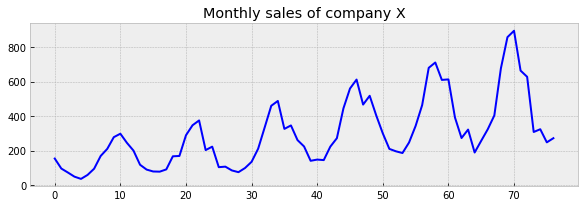

In [4]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [5]:
Monthly_sales_of_company_X = boxcox(all_series['Monthly sales of company X'], 0)

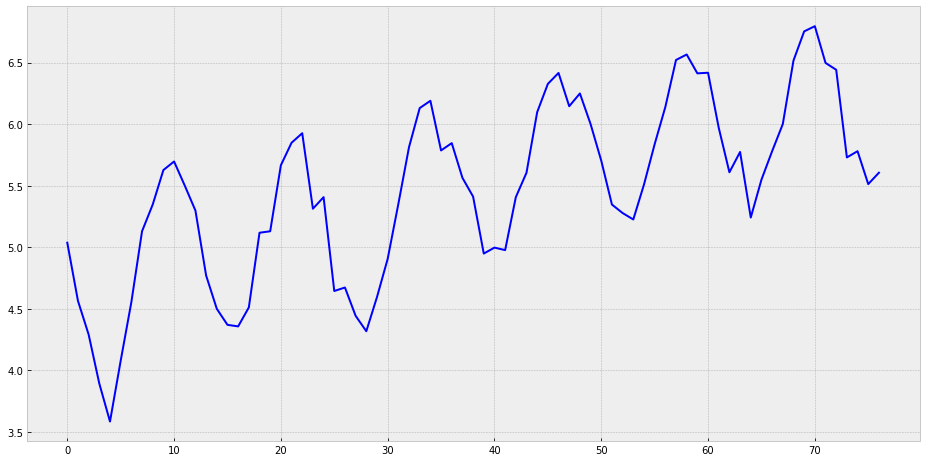

In [6]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(Monthly_sales_of_company_X, color='blue')


In [7]:
day = 1
week = 7
month = 12
days = 30

In [8]:
Monthly_sales_of_company_X = Monthly_sales_of_company_X[days:] - Monthly_sales_of_company_X[:-days]
Monthly_sales_of_company_X = Monthly_sales_of_company_X[month:] - Monthly_sales_of_company_X[:-month]

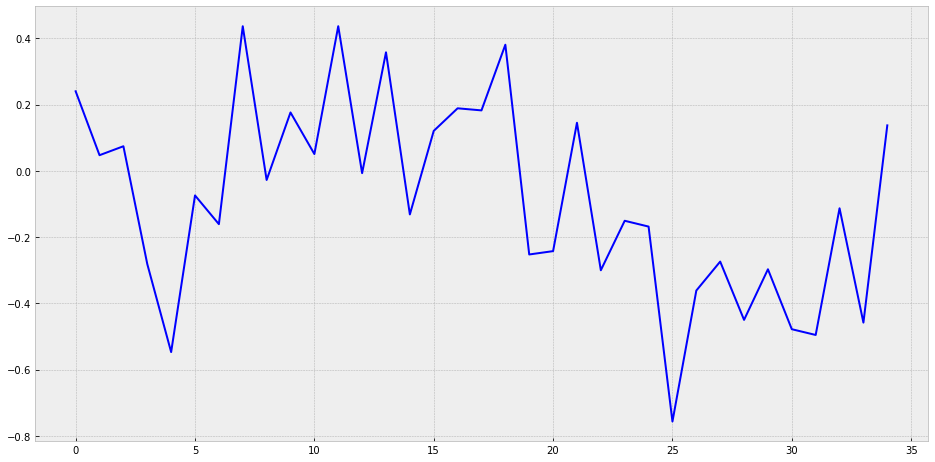

In [9]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(Monthly_sales_of_company_X, color='blue')

In [10]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [11]:
test_stationarity(Monthly_sales_of_company_X)

Results of Dickey-Fuller Test:
Test Statistic                 -4.005775
p-value                         0.001381
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


p:\python 384 64bit\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
